In [1]:
# Include Dependencies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # for plotting graphs
import seaborn as sns# statistical data visualization library
from functools import cmp_to_key

from sklearn import metrics
import math
import tensorflow as tf
from tensorflow.python.data import Dataset

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train['Embarked']

In [ ]:
train.loc[train['Age'] < 16]


In [ ]:
train.loc[train['Age'] > 20]

In [ ]:
test.head(800)

In [2]:
#Fill Embarked NA and convert object to strings
train['Embarked'].fillna('S', inplace = True)
train.apply(lambda x = type(object): str(x))
#train = pd.get_dummies(data=train, columns=['Embarked'])

#del train['Embarked']
#train['Embarked'] = col_as_string

#Fill Age NA
train['Age'].fillna(-1, inplace = True)


In [3]:
def get_title(name):
    start = name.find(', ', 0) + 2
    end = name.find('.', start)
    return(name[start:end])
    
train['Title']=train['Name'].map(lambda x: get_title(x))
test['Title']=test['Name'].map(lambda x: get_title(x))

In [4]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
dtype: object

In [12]:
def rebucket_title(title):
#    title = str(title)
    if title == 'Don':
        title = 'Mr'
    elif title == 'Rev':
        title = 'Mr'
    elif title == 'Dr':
        title = 'Mr'
    elif title == 'Mme':
        title = 'Miss'
    elif title == 'Major':
        title = 'Crew'
    elif title == 'Lady':
        title = 'Mrs'
    elif title == 'Sir':
        title = 'Mr'
    elif title == 'Mlle':
        title = 'Miss'
    elif title == 'Col':
        title = 'Crew'
    elif title == 'Capt':
        title = 'Crew'
    elif title == 'the Countess':
        title = 'Mrs'
    elif title == 'Jonkheer':
        title = 'Mrs'
    elif title == 'Dona':
        title = 'Mrs'
    elif title == 'Ms':
        title = 'Mrs'
    return (title)

In [6]:
rebucket_title('Sir')

'Mr'

In [13]:
train['Title'] = train['Title'].apply(lambda x: rebucket_title(x))
test['Title'] = test['Title'].apply(lambda x: rebucket_title(x))

In [14]:
train['Title'].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Crew'], dtype=object)

In [15]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Crew'], dtype=object)

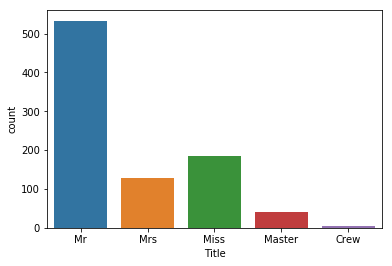

In [16]:
sns.countplot(x='Title', data=train)

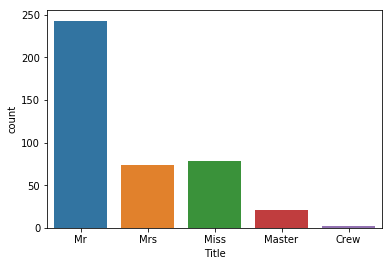

In [17]:
sns.countplot(x='Title', data=test)

In [ ]:

histogram_age = pd.read_csv('train.csv')
histogram_age['Age'].fillna(0, inplace = True)

In [ ]:
histogram_age[['Age']].plot.hist()

In [ ]:
histogram_age.plot.scatter(x = 'Age', y = 'Survived')

In [ ]:
train['Embarked']

In [ ]:
train = pd.get_dummies(data=train, columns=['Sex'])

In [ ]:
train.dtypes

In [ ]:
plot_columns = ['Survived', 'Pclass', 'Sex_female', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
type(train[plot_columns])

In [ ]:
sns.pairplot(train[plot_columns])

In [ ]:
train[plot_columns]
corr = train[plot_columns].corr()
sns.heatmap(corr)

In [ ]:
train['Age'].plot.hist()

In [ ]:
sns.jointplot(x = 'Age', y = 'Survived', data = train, kind ='hex', gridsize = 40)

In [ ]:
def min2(l, default = 0.0):
    if len(l) == 0:
        return default
    else:
        return min(l)

def max2(l, default = 0.0):
    if len(l) == 0:
        return default
    else:
        return max(l)

def avg2(l, default = 0.0):
    if len(l) == 0:
        return default
    else:
        return float(sum(l)) / float(len(l))

def std2(l, default = 0.0):
    if len(l) == 0:
        return default
    else:
        return np.std(l)

def histogram_for_non_numerical_series(s):
    d = {}
    for v in s:
        d[v] = d.get(v, 0) + 1
    bin_s_label = list(d.keys())
    bin_s_label.sort()
    bin_s = list(range(0, len(bin_s_label)))
    hist_s = [d[v] for v in bin_s_label]
    bin_s.append(len(bin_s))
    bin_s_label.insert(0, '_')
    return (hist_s, bin_s, bin_s_label)
    
def plot_hist_with_target3(plt, df, feature, target, histogram_bins = 10):
    # reference:
    #    https://stackoverflow.com/questions/33328774/box-plot-with-min-max-average-and-standard-deviation
    #    https://matplotlib.org/gallery/api/two_scales.html 
    #    https://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html
    #    https://matplotlib.org/2.0.0/examples/color/named_colors.html
    #    https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html
    title = feature
    plt.title(title)
    s = df[feature]
    t = df[target]
    t_max = max(t)
    # get histogram of the feature
    bin_s_label = None
    # fillna with 0.0 or '_N/A_'
    na_cnt = sum(s.isna())
    if na_cnt > 0:
        if True in [type(_) == str for _ in s]:
            print('found %d na in string field %s' % (na_cnt, feature))
            s = s.fillna('_N/A_')
        else:
            print('found %d na in numerical field %s' % (na_cnt, feature))
            s = s.fillna(-1.0)
    try:
        hist_s, bin_s = np.histogram(s, bins = histogram_bins)
    except Exception as e:
        # print('ERROR: failed to draw histogram for %s: %s: %s' % (name, type(e).__name__, str(e)))
        hist_s, bin_s, bin_s_label = histogram_for_non_numerical_series(s)
        # return
    # histogram of target by distribution of feature
    hist_t_by_s_cnt = [0] * (len(bin_s) - 1)
    hist_t_by_s = [] 
    for i in range(0, (len(bin_s) - 1)):
        hist_t_by_s.append([])
    # get target histogram for numerical feature
    if bin_s_label is None:
        for (sv, tv) in zip(s, t):
            pos = 0
            for i in range(0, len(bin_s) - 1):
                if sv >= bin_s[i]:
                    pos = i
            hist_t_by_s_cnt[pos] += 1
            hist_t_by_s[pos].append(tv)
    else:
        for (sv, tv) in zip(s, t):
            pos = bin_s_label.index(sv) - 1
            hist_t_by_s_cnt[pos] += 1
            hist_t_by_s[pos].append(tv)
        # count avg, to re-sort bin_s and bin_s_label by avg
        hist_t_by_s_avg = [float(avg2(n)) for n in hist_t_by_s]
        # hist_t_by_s_std = [float(std2(n)) for n in hist_t_by_s]
        # hist_t_by_s_adj = list(np.array(hist_t_by_s_avg) + np.array(hist_t_by_s_std))
        hist_t_by_s_adj = hist_t_by_s_avg
        # print('before sort:\n%s\n%s\n%s' % (bin_s, bin_s_label, hist_t_by_s_adj))
        bin_hist_label = list(zip(bin_s[1:], hist_t_by_s_adj, bin_s_label[1:]))
        bin_hist_label.sort(key = cmp_to_key(lambda x, y: x[1] - y[1]))
        (bin_s, hist_t_by_s_adj, bin_s_label) = zip(*bin_hist_label)
        bin_s = list(bin_s)
        hist_t_by_s_adj = list(hist_t_by_s_adj)
        bin_s_label = list(bin_s_label)
        bin_s.insert(0, 0)
        bin_s_label.insert(0, '_')
        # re-arrange hist_s and hist_t_by_s
        hist_s_new = []
        hist_t_by_s_new = []
        for i in bin_s[1:]:
            hist_s_new.append(hist_s[i - 1])
            hist_t_by_s_new.append(hist_t_by_s[i - 1])
        hist_s = hist_s_new
        hist_t_by_s = hist_t_by_s_new
        # print('after sort:\n%s\n%s\n%s' % (bin_s, bin_s_label, hist_t_by_s_adj))
        # reset bin_s's ordering
        bin_s.sort()
    hist_s = list(hist_s)
    if len(hist_s) < len(bin_s):
        hist_s.insert(0, 0.0)
    hist_s_max = max(hist_s)
    plt.fill_between(bin_s, hist_s, step = 'mid', alpha = 0.5, label = feature)
    if bin_s_label is not None:
        plt.xticks(bin_s, bin_s_label)
    plt.xticks(rotation = 90)
    # just to show legend for ax2
    # plt.errorbar([], [], yerr = [], fmt = 'ok', lw = 3, ecolor = 'sienna', mfc = 'sienna', label = target)
    plt.legend(loc = 'upper right')
    hist_t_by_s = list(hist_t_by_s)
    if len(hist_t_by_s) < len(bin_s):
        hist_t_by_s.insert(0, [0.0])
    hist_t_by_s_min = [float(min2(n)) for n in hist_t_by_s]
    hist_t_by_s_max = [float(max2(n)) for n in hist_t_by_s]
    hist_t_by_s_avg = [float(avg2(n)) for n in hist_t_by_s]
    hist_t_by_s_std = [float(std2(n)) for n in hist_t_by_s]
    hist_t_by_s_err = [np.array(hist_t_by_s_avg) - np.array(hist_t_by_s_min), np.array(hist_t_by_s_max) - np.array(hist_t_by_s_avg)]
    plt.xlabel(feature)
    plt.ylabel('Count')
    ax2 = plt.twinx()
    ax2.grid(False)
    ax2.errorbar(bin_s, hist_t_by_s_avg, yerr = hist_t_by_s_err, fmt='.k', lw = 1, ecolor = 'sienna')
    ax2.errorbar(bin_s, hist_t_by_s_avg, yerr = hist_t_by_s_std, fmt='ok', lw = 3, ecolor = 'sienna', mfc = 'sienna', label = target)
    ax2.set_ylabel(target)
    plt.legend(loc = 'upper left')
    plt.tight_layout()

In [ ]:
plt.figure(figsize = (100, 200))
i = 1
for name in histogram_age.keys():
    plt.subplot(21, 4, i)
    plot_hist_with_target3(plt, train, name, 'Survived', histogram_bins = 'histogram_age')
    i += 1
plt.tight_layout()